# AstroBasis example

Welcome in the `JuliaStellarDynamics` user community. This example notebook should help you through your first interaction with the `AstroBasis` library.

## Packages management

Installing the necessary libraries. This only has to be run once (or never if they already are installed in your environment or project).

In [ ]:
using Pkg
# If you want to work in a particular environment/project, 
# fill and uncomment the following line
# Pkg.activate(/path/to/my_env)
# You could also add the AstroBasis library at this stage (if not already done), 
# by uncommenting the following line
# Pkg.add(url="https://github.com/JuliaStellarDynamics/AstroBasis.jl.git")
Pkg.add(["Plots","LaTeXStrings"])

Importing these library in the main context.

In [ ]:
import AstroBasis
using Plots
using LaTeXStrings

## Simple basis plot

In [ ]:
# Creating the basis
G, rb = 1., 1.;
ltest, nradial = 2, 5;
basis = AstroBasis.CB73Basis(lmax=ltest,nradial=nradial,G=G, rb=rb);

In [ ]:
# Points (rescaled radius)
nx = 200;
rmin, rmax = 0., 3.;
tabx = collect(LinRange(rmin/basis.rb,rmax/basis.rb,nx));

In [ ]:
# Compute the values of the potential basis elements and store them
tabU = zeros(nradial,nx) # Storage for the basis values
for j = 1:nx
    # Compute all the basis elements values at a given location r (the result is stored in basis.tabUl)
    AstroBasis.tabUl!(basis,ltest,tabx[j]*basis.rb)
    # Store them in tabU
    for i = 1:nradial
        tabU[i,j] = basis.tabUl[i]
    end
end

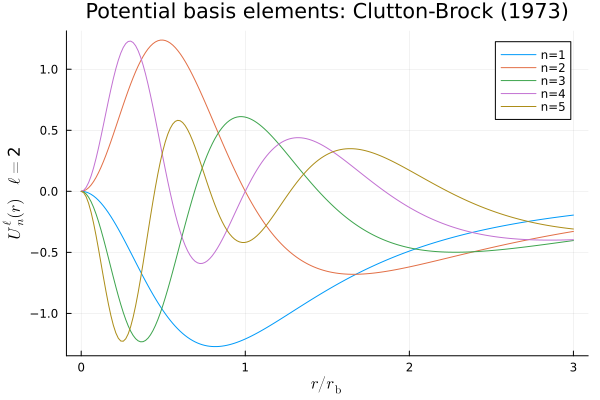

In [6]:
# Plot the curves
labels = reshape(["n="*string(k) for k=1:nradial],(1,nradial)) #Need to be row
plU=plot(tabx, transpose(tabU), title = "Potential basis elements: Clutton-Brock (1973)",label=labels)
xlabel!(plU, L"$r / r_{\mathrm{b}}$")
ylabel!(plU, L"$U^{\ell}_n (r)\quad \ell=$"*string(ltest))

## Defining your own basis

You can also provide/define your own basis by :
1. Defining a [structure](https://docs.julialang.org/en/v1/manual/types/#Composite-Types) (proxy for class in Julia but does not behave the same)
2. Defining the methods for mandatory functions

In [ ]:
# Defining your own basis
struct myBasis <: AstroBasis.AbstractAstroBasis # "<:" stands for "subtype of"

    # The followings are mandatory fields (there is no such thing as classic inheritence in Julia)
    # The abstract type AbstractAstroBasis does not contain any "attribute"
    name::String        # Basis name
    dimension::Int64    # Basis dimension (disc → 2, sphere → 3)

    lmax::Int64         # Maximal harmonic/azimuthal index (starts at 0)
    nradial::Int64      # Maximal radial index (≥ 1)

    G::Float64          # Gravitational constant (default 1.0)
    rb::Float64         # Radial extension (default 1.0)

    tabUl::Array{Float64,1}     # Potential elements value array
    tabDl::Array{Float64,1}     # Density elements value array

    # Can add other attributes (e.g., to store some prefactors)
end
# A constructor is automatically defined, but you can provide an other 
# (e.g., to have default values or initialize some prefactors)
function myBasis(;name::String="myBasis", dimension::Int64=2,
                    lmax::Int64=0, nradial::Int64=0,
                    G::Float64=1., rb::Float64=1.)

    basis = myBasis(name,dimension,
                      lmax,nradial,
                      G,rb,
                      zeros(Int64,nradial),zeros(Float64,nradial)) # Elements value arrays

    return basis
end

In [ ]:
# Defining the potential basis values
"""
    tabUl!(basis::myBasis, l, r)

Define the value of the potential basis elements (harmonic l) ar a given radius r.
The result is stored in basis.tabUl
"""
function AstroBasis.tabUl!(basis::myBasis,
                           l::Int64,r::Float64)

    for n=1:basis.nradial # Loop over the radial basis numbers.
        # Caution, the basis radial number often start at 0
        # But Julia is 1-based indexing.
        basis.tabUl[n+1] = n*(r/basis.rb)^l # The function you want
    end
end

# Defining the density basis values
"""
    tabDl!(basis::myBasis, l, r)

Define the value of the density basis elements (harmonic l) ar a given radius r.
The result is stored in basis.tabDl
"""
function AstroBasis.tabDl!(basis::myBasis,
                           l::Int64,r::Float64)

    for n=1:basis.nradial # Loop over the radial basis numbers.
        basis.tabDl[n+1] = (r/basis.rb)^l # The function you want
    end
end